In [ ]:
#Importing all the Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

fb=pd.read_csv('DRREDDY.NS.csv',parse_dates=True,index_col='Date')
fb=fb.drop(columns=['Adj Close','Open','Low','High','Volume'])

Saving DRREDDY.NS.csv to DRREDDY.NS (1).csv


In [ ]:
fin =fb
fin

,Close
Date,
2008-01-01,725.150024
2008-01-02,745.549988
2008-01-03,714.299988
2008-01-04,728.700012
2008-01-07,712.299988
...,...
2020-10-26,4978.100098
2020-10-27,5099.399902
2020-10-28,4951.000000


In [ ]:
fb=fb.asfreq(freq='D',method='bfill')
fin = fin.asfreq(freq='D',method='bfill')
fin

,Close
Date,
2008-01-01,725.150024
2008-01-02,745.549988
2008-01-03,714.299988
2008-01-04,728.700012
2008-01-05,712.299988
...,...
2020-10-26,4978.100098
2020-10-27,5099.399902
2020-10-28,4951.000000


In [ ]:
fb

,Close
Date,
2008-01-01,725.150024
2008-01-02,745.549988
2008-01-03,714.299988
2008-01-04,728.700012
2008-01-05,712.299988
...,...
2020-10-26,4978.100098
2020-10-27,5099.399902
2020-10-28,4951.000000



#Forecasting Procedure:
   
   1.)Choose a Model
   2.)Split the Data into Training and Test Data
   3.)Fit the Model on Training Data
   4.)Evaluate the Model on Test Data
   5.)Re-Fit the Model on Entire Data
   6.)Forecast for Future Data
   
   

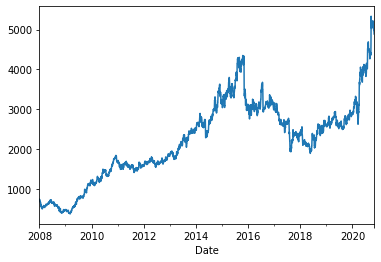

In [ ]:
fb['Close'].plot()

In [ ]:
fb=fb.fillna(method='ffill')
fin = fin.fillna(method='ffill')

In [ ]:
fb.isnull().values.any()
fin.isnull().values.any()

False

In [ ]:
breakup=seasonal_decompose(fb['Close'],model='additive')

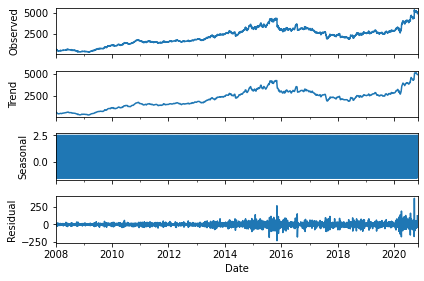

In [ ]:
breakup.plot();

In [ ]:
len(fb)

4687

In [ ]:
train_fb=fb.iloc[:-468]
test_fb=fb.iloc[-468:]

In [ ]:
train_fb.tail()

,Close
Date,
2019-07-16,2676.500000
2019-07-17,2666.300049
2019-07-18,2655.550049
2019-07-19,2613.149902
2019-07-20,2632.500000


In [ ]:
test_fb.head()

,Close
Date,
2019-07-21,2632.500000
2019-07-22,2632.500000
2019-07-23,2599.350098
2019-07-24,2599.050049
2019-07-25,2654.100098


# Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
test_fb_model=ExponentialSmoothing(train_fb['Close'],trend='add',seasonal='mul',seasonal_periods=365).fit()

In [ ]:
test_fb_predictions=test_fb_model.forecast(468)

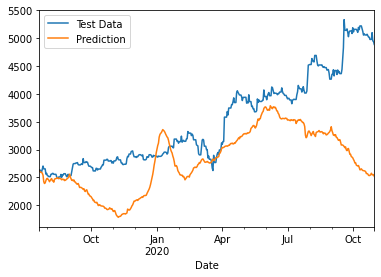

In [ ]:

test_fb['Close'].plot(legend=True,label='Test Data')
test_fb_predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
std=fb['Close'].std()
rmse=np.sqrt(mean_squared_error(test_fb['Close'],test_fb_predictions))
rmse,std

(952.8372456076175, 1012.3985815916589)

In [ ]:
fb_ES_model=ExponentialSmoothing(fb['Close'],trend='add',seasonal='mul',seasonal_periods=90).fit()
fb_ES_Predictions=fb_ES_model.forecast(240)


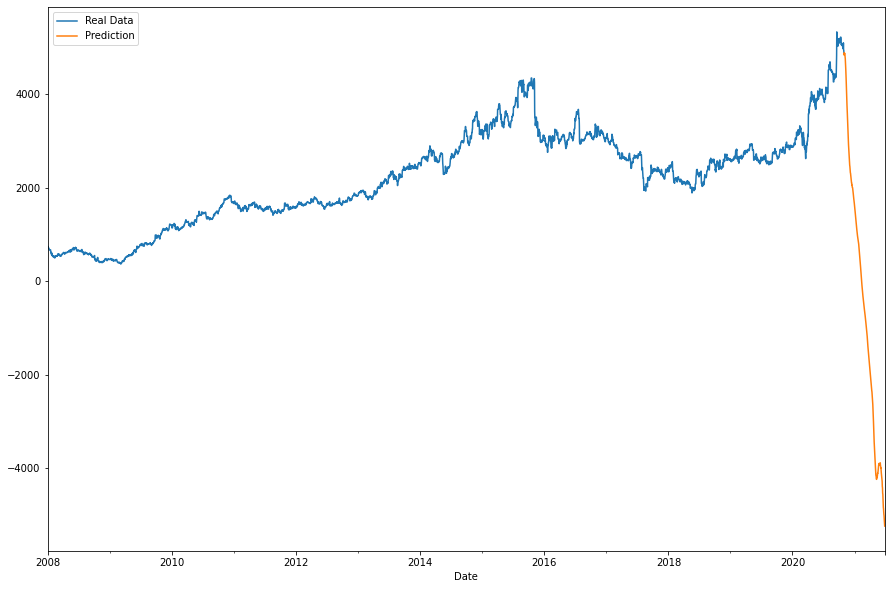

In [ ]:
fb['Close'].plot(legend=True,label='Real Data',figsize=(15,10))
fb_ES_Predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_fb['Close'], test_fb_predictions) 

712.1836967463132

In [ ]:
mape = np.mean(np.abs((test_fb['Close'] -test_fb_predictions)/test_fb['Close']))*100
mape


18.746907605687007

# ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
fin

,Close
Date,
2008-01-01,725.150024
2008-01-02,745.549988
2008-01-03,714.299988
2008-01-04,728.700012
2008-01-05,712.299988
...,...
2020-10-26,4978.100098
2020-10-27,5099.399902
2020-10-28,4951.000000


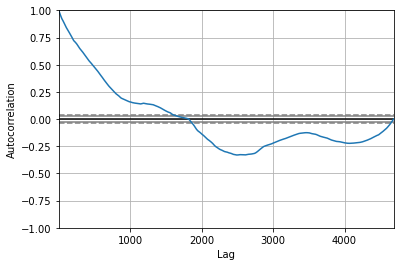

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fin)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 4685
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -23490.002
Method:                       css-mle   S.D. of innovations             36.382
Date:                Wed, 02 Dec 2020   AIC                          46990.003
Time:                        21:56:15   BIC                          47022.264
Sample:                    01-03-2008   HQIC                         47001.347
                         - 10-30-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.000      0.741      0.458      -0.001       0.001
ar.L1.D2.Close     0.0624      0.015      4.269      0.000       0.034       0.091
ar.L2.D2.Close     0.0219      0.015

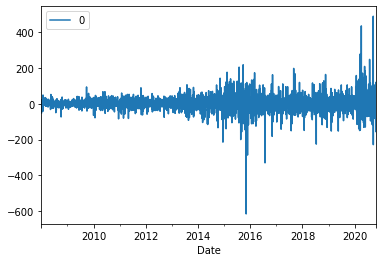

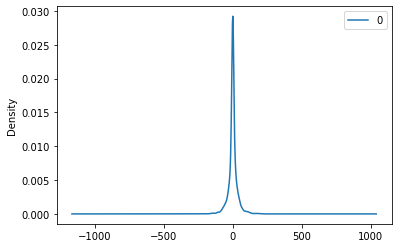

                 0
count  4685.000000
mean      0.039677
std      36.398024
min    -615.441682
25%      -7.988914
50%      -0.741620
75%       8.153704
max     488.103098


In [ ]:
from pandas import DataFrame
model = ARIMA(fin, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
pyplot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
import math
from sklearn.metrics import mean_squared_error
X = fin.values
size = int(len(X) * 0.66)
train, test = X[0:4500], X[4501:4685]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,0))
	model_fit = model.fit(disp=1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



predicted=3966.138269, expected=3949.750000
predicted=3930.808362, expected=3880.699951
predicted=3844.223859, expected=3936.300049
predicted=3928.208414, expected=3939.000000
predicted=3935.640221, expected=3939.000000
predicted=3956.792971, expected=3939.000000
predicted=3939.823122, expected=3939.000000
predicted=3938.998725, expected=3833.899902
predicted=3792.370943, expected=3852.500000
predicted=3828.261575, expected=3837.649902
predicted=3805.237530, expected=3984.000000
predicted=4042.952599, expected=3862.000000
predicted=3854.303871, expected=3862.000000
predicted=3869.321265, expected=3862.000000
predicted=3824.910577, expected=3773.399902
predicted=3738.760686, expected=3779.600098
predicted=3755.004752, expected=3732.000000
predicted=3688.297351, expected=3735.100098
predicted=3723.646097, expected=3679.149902
predicted=3643.785221, expected=3679.149902
predicted=3662.955831, expected=3679.149902
predicted=3662.124753, expected=3699.600098
predicted=3707.577277, expected=

In [ ]:
error = mean_squared_error(test, predictions)
rmse = math.sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot

Test RMSE: 84.691


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test, predictions) 

55.82076906316014

In [ ]:
mape = np.mean(np.abs((test - predictions)/test))*100
mape


1.2682282403266076

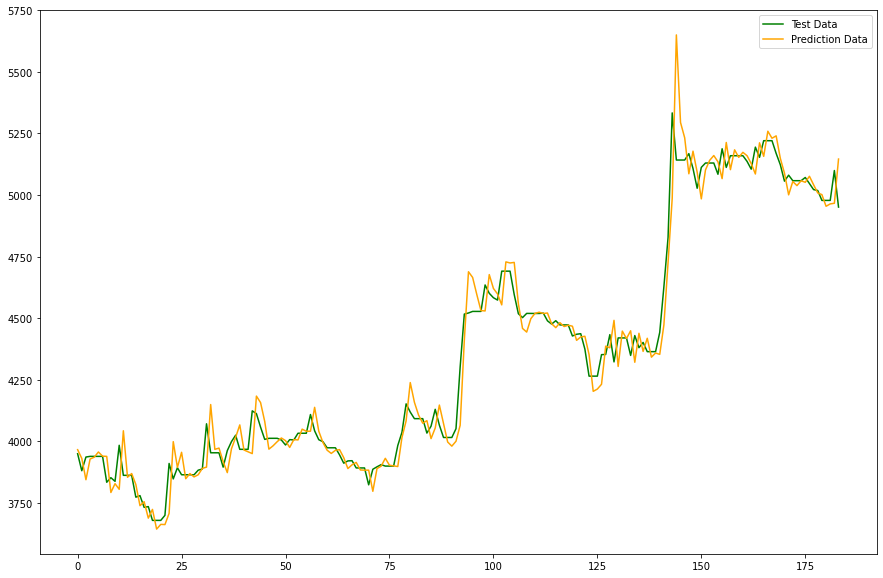

In [ ]:
plt.figure(figsize=(15,10))

pyplot.plot(test, color = 'green')
pyplot.plot(predictions, color='orange')
pyplot.legend(['Test Data','Prediction Data'])
pyplot.show()

## NEW ARIMA


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()